In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC

In [ ]:
df=pd.read_csv("bank_retirement.csv")

In [ ]:
df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [ ]:
df.shape

(500, 4)

In [ ]:
df.describe()

,Customer ID,Age,401K Savings,Retire
count,500.000000,500.000000,500.000000,500.000000
mean,249.500000,46.757077,534984.465804,0.500000
std,144.481833,7.790125,187675.818881,0.500501
min,0.000000,25.000000,10.000000,0.000000
25%,124.750000,41.299451,382626.524425,0.000000
50%,249.500000,46.695770,534512.984350,0.500000
75%,374.250000,52.322551,680670.257025,1.000000
max,499.000000,70.000000,1000000.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer ID   500 non-null    int64  
 1   Age           500 non-null    float64
 2   401K Savings  500 non-null    float64
 3   Retire        500 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


**Visualizing The data**

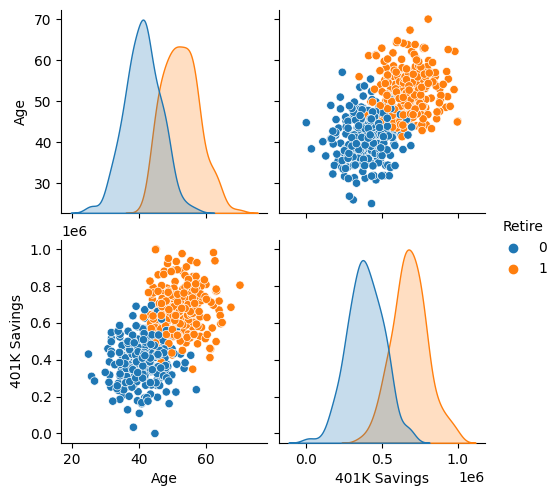

In [ ]:
sns.pairplot(df,vars=["Age","401K Savings"],hue="Retire")

In [ ]:
df["Retire"].value_counts()

0    250
1    250
Name: Retire, dtype: int64

<Axes: xlabel='Retire', ylabel='count'>

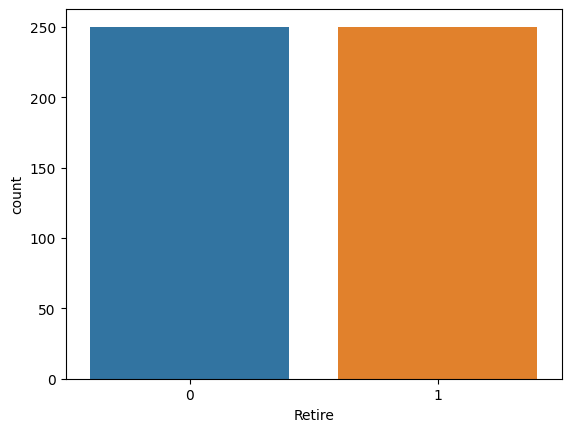

In [ ]:
sns.countplot(x=df["Retire"],label="Retirement plot")

**model training**

In [ ]:
df2=df.drop("Customer ID",axis=1)
df2.head()

,Age,401K Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1


In [ ]:
x=df2.drop("Retire",axis=1)
y=df2["Retire"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
trained_svc=SVC().fit(x_train,y_train)

<Axes: >

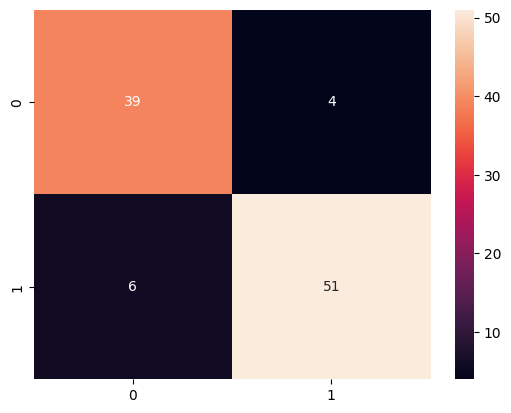

In [ ]:
y_pred=trained_svc.predict(x_test)

cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        43
           1       0.93      0.89      0.91        57

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



**Improving The Model**

In [ ]:
min_train=x_train.min()
range_train=(x_train - min_train).max()
x_train_scaled=(x_train-min_train)/range_train

x_train_scaled.head()

,Age,401K Savings
247,0.488640,0.684860
390,0.731713,0.651642
186,0.636117,0.669911
484,0.544773,0.718011
139,0.455655,0.363796


In [ ]:
min_test=x_test.min()
range_test=(x_test - min_test).max()
x_test_scaled=(x_test-min_test)/range_test

x_test_scaled.head()

,Age,401K Savings
241,0.267183,0.094430
448,0.165409,0.505061
75,0.139272,0.302988
212,0.248950,0.550203
481,0.323557,0.677682


In [ ]:
normalized_svc=SVC().fit(x_train_scaled,y_train)

<Axes: >

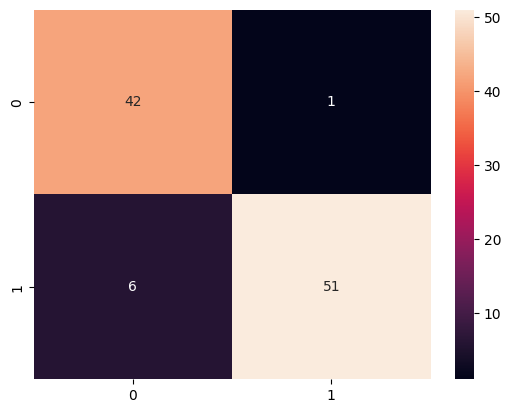

In [ ]:
new_y_pred = normalized_svc.predict(x_test_scaled)

cm = confusion_matrix(y_test,new_y_pred)

sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test,new_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.94        57

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



In [ ]:
params_grid={"C":[0.1,1,10,100],"gamma":[1,0.1,0.01,0.001],"kernel":["rbf"]}

In [ ]:
grid=GridSearchCV(SVC(),params_grid,refit=True,verbose=4)

grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.975 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [ ]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

<Axes: >

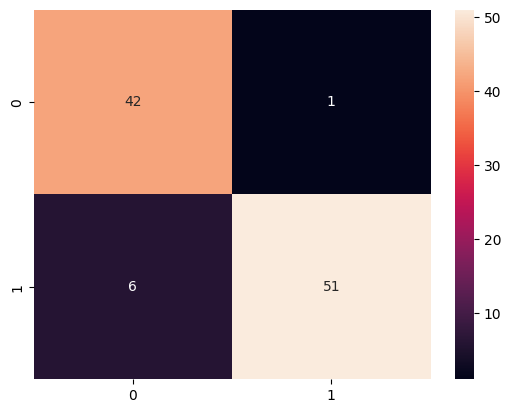

In [ ]:
grid_y_pred=grid.predict(x_test_scaled)

cm=confusion_matrix(y_test,grid_y_pred)

sns.heatmap(cm,annot=True)